# Single-layer perceptron network for AND logic classification

## Imports
Import of all necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step function
Perceptron activation function called “step function”.

In [2]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

## Predict function
Function to make predictions by evaluating the activation function by “net”.

In [3]:
def perceptron_predict(X, weights):
    return step_function(np.dot(X, weights[1:]) + weights[0])

## Train function
Training of the perceptron by means of modifications of the different weights and storage of the errors for each iteration and totals for each epoch. 

In [7]:
def perceptron_train(X, y, learning_rate=0.1, epochs=100):
    weights = np.random.rand(X.shape[1] + 1)
    errors = []
    
    for _ in range(epochs):
        total_error = 0
        
        for xi, target in zip(X, y):
            output = perceptron_predict(xi, weights)
            
            error = target - output
            total_error += abs(error)
            
            update = learning_rate * (target - output)
            
            weights[1:] += update * xi
            weights[0] += update
        
        errors.append(total_error)
    
    return weights, errors

## Input data
Preparation of the input and output data for the AND gate.


In [5]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

## Training
Training of the perceptron with input and output data.

In [13]:
weights, errors = perceptron_train(X, y, learning_rate=0.1, epochs=10)

print("Weights: ", weights)
print("Errors: ", errors)

Weights:  [-0.51888901  0.43843857  0.16827003]
Errors:  [3, 3, 3, 2, 1, 0, 0, 0, 0, 0]


## Error graphics
Graph of the global error for each epoch.

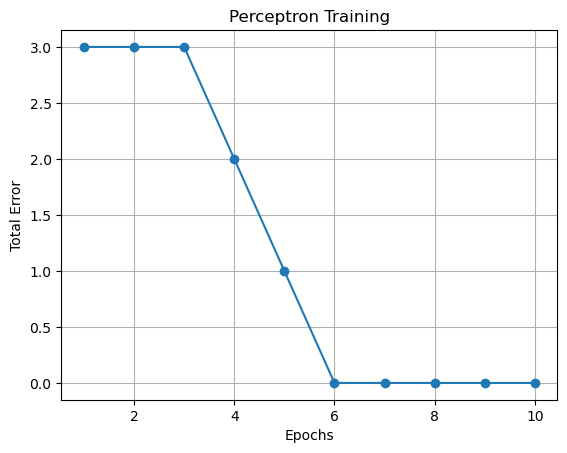

In [15]:
plt.figure(1)
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Perceptron Training')
plt.grid(True)
plt.show()

## Predictions
Perceptron validation with input data and weights already generated after a learning corrector.

In [16]:
for xi in X:
    prediction = perceptron_predict(xi, weights)
    print("Input: ", xi, "Prediction: ", prediction)

Input:  [0 0] Prediction:  0
Input:  [0 1] Prediction:  0
Input:  [1 0] Prediction:  0
Input:  [1 1] Prediction:  1


## Classification graphic
Graph of the classification performed by the algorithm after successful learning along with the classification line between the two classes. 

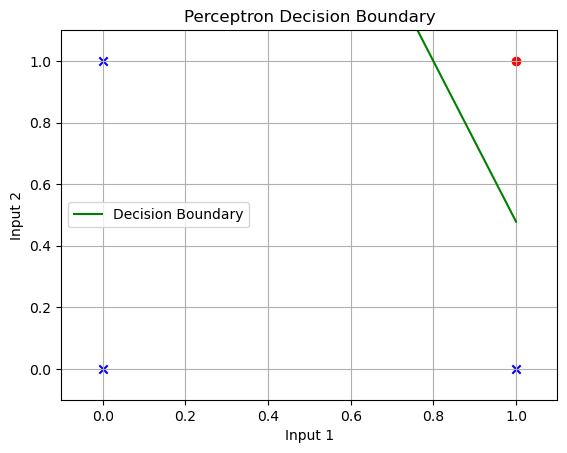

In [17]:
plt.figure(2)

for i, xi in enumerate(X):
    if y[i] == 1:
        plt.scatter(xi[0], xi[1], color='red', marker='o', label='0' if i == 0 else '')
    else: 
        plt.scatter(xi[0], xi[1], color='blue', marker='x', label='1' if i == 3 else '')

x_values = np.array([0, 1])
y_values = -(weights[1] * x_values + weights[0]) / weights[2]

plt.plot(x_values, y_values, label='Decision Boundary', color='green')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.title('Perceptron Decision Boundary')
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()